In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#vehicle revenue miles (VRM)
df = pd.read_excel('May 2023 Complete Monthly Ridership (with adjustments and estimates).xlsx', sheet_name='VRM')

df.head()

,NTD ID,Legacy NTD ID,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,1/2002,2/2002,3/2002,4/2002,5/2002,6/2002,7/2002,8/2002,9/2002,10/2002,11/2002,12/2002,1/2003,2/2003,3/2003,4/2003,5/2003,6/2003,7/2003,8/2003,9/2003,10/2003,11/2003,12/2003,1/2004,2/2004,3/2004,4/2004,5/2004,6/2004,7/2004,8/2004,9/2004,10/2004,11/2004,12/2004,1/2005,2/2005,3/2005,4/2005,5/2005,6/2005,7/2005,8/2005,9/2005,10/2005,11/2005,12/2005,1/2006,2/2006,3/2006,4/2006,5/2006,6/2006,7/2006,8/2006,9/2006,10/2006,11/2006,12/2006,1/2007,2/2007,3/2007,4/2007,5/2007,6/2007,7/2007,8/2007,9/2007,10/2007,11/2007,12/2007,1/2008,2/2008,3/2008,4/2008,5/2008,6/2008,7/2008,8/2008,9/2008,10/2008,11/2008,12/2008,1/2009,2/2009,3/2009,4/2009,5/2009,6/2009,7/2009,8/2009,9/2009,10/2009,11/2009,12/2009,1/2010,2/2010,3/2010,4/2010,5/2010,6/2010,7/2010,8/2010,9/2010,10/2010,11/2010,12/2010,1/2011,2/2011,3/2011,4/2011,5/2011,6/2011,7/2011,8/2011,9/2011,10/2011,11/2011,12/2011,1/2012,2/2012,3/2012,4/2012,5/2012,6/2012,7/2012,8/2012,9/2012,10/2012,11/2012,12/2012,1/2013,2/2013,3/2013,4/2013,5/2013,6/2013,7/2013,8/2013,9/2013,10/2013,11/2013,12/2013,1/2014,2/2014,3/2014,4/2014,5/2014,6/2014,7/2014,8/2014,9/2014,10/2014,11/2014,12/2014,1/2015,2/2015,3/2015,4/2015,5/2015,6/2015,7/2015,8/2015,9/2015,10/2015,11/2015,12/2015,1/2016,2/2016,3/2016,4/2016,5/2016,6/2016,7/2016,8/2016,9/2016,10/2016,11/2016,12/2016,1/2017,2/2017,3/2017,4/2017,5/2017,6/2017,7/2017,8/2017,9/2017,10/2017,11/2017,12/2017,1/2018,2/2018,3/2018,4/2018,5/2018,6/2018,7/2018,8/2018,9/2018,10/2018,11/2018,12/2018,1/2019,2/2019,3/2019,4/2019,5/2019,6/2019,7/2019,8/2019,9/2019,10/2019,11/2019,12/2019,1/2020,2/2020,3/2020,4/2020,5/2020,6/2020,7/2020,8/2020,9/2020,10/2020,11/2020,12/2020,1/2021,2/2021,3/2021,4/2021,5/2021,6/2021,7/2021,8/2021,9/2021,10/2021,11/2021,12/2021,1/2022,2/2022,3/2022,4/2022,5/2022,6/2022,7/2022,8/2022,9/2022,10/2022,11/2022,12/2022,1/2023,2/2023,3/2023,4/2023,5/2023
0,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",DR,PT,Bus,746158.0,656324.0,726578.0,736975.0,746158.0,696633.0,746158.0,747339.0,695451.0,766920.0,696633.0,725396.0,761210.0,697454.0,777948.0,795216.0,787912.0,748855.0,793074.0,754939.0,752394.0,843825.0,701931.0,728026.0,747628.0,771845.0,883913.0,857232.0,841169.0,847193.0,825119.0,820359.0,806457.0,829771.0,895134.0,905623.0,774351.0,753949.0,848372.0,821603.0,886438.0,862034.0,843133.0,905209.0,845207.0,865101.0,812467.0,797799.0,798647.0,754978.0,870726.0,811068.0,869933.0,862697.0,864720.0,940351.0,882333.0,895883.0,765935.0,728139.0,789831.0,782401.0,872267.0,864049.0,963309.0,846949.0,848425.0,891059.0,799670.0,921386.0,829419.0,820341.0,746766.0,735504.0,760462.0,797155.0,794368.0,749376.0,793643.0,750790.0,745579.0,848123.0,714143.0,737948.0,841743.0,774171.0,853798.0,851673.0,816168.0,828250.0,855102.0,832296.0,832413.0,897303.0,782787.0,809271.0,778833.0,753302.0,867834.0,836731.0,808656.0,810494.0,812026.0,824703.0,816410.0,878178.0,763045.0,816721.0,835425.0,780800.0,922064.0,863560.0,877355.0,858632.0,807759.0,866152.0,821033.0,849680.0,800887.0,752367.0,708973.0,814776.0,867424.0,833241.0,882908.0,809746.0,812980.0,851610.0,767559.0,873579.0,794750.0,741422.0,823920.0,778181.0,832695.0,854336.0,872258.0,788483.0,825955.0,819781.0,760267.0,862747.0,745981.0,705354.0,768910.0,688770.0,748916.0,781409.0,761544.0,714233.0,726415.0,702592.0,693406.0,776224.0,654371.0,658414.0,585118.0,558914.0,599948.0,587702.0,574770.0,569771.0,562844.0,547513.0,528987.0,571210.0,502916.0,515948.0,628731.0,657129.0,706423.0,686973.0,681681.0,668495.0,633077.0,695930.0,655110.0,681981.0,641698.0,596968.0,635089.0,578776.0,701185.0,657496.0,693832.0,662008.0,632230.0,682834.0,613870.0,689045.0,644004.0,611734.0,695625.0,634643.0,707393.0,699070.0,735695.0,686858.0,696654.0,734015.0,649497.0,753757.0,686471.0,656197.0,722368.0,503211.0,718918.0,741892.0,760626.0,702880.0,749261.0,751070.0,702267.0,789753

In [4]:
col = df.columns.to_list()

In [5]:
print(col)

['NTD ID', 'Legacy NTD ID', 'Agency', 'Status', 'Reporter Type', 'UZA', 'UACE CD', 'UZA Name', 'Mode', 'TOS', '3 Mode', '1/2002', '2/2002', '3/2002', '4/2002', '5/2002', '6/2002', '7/2002', '8/2002', '9/2002', '10/2002', '11/2002', '12/2002', '1/2003', '2/2003', '3/2003', '4/2003', '5/2003', '6/2003', '7/2003', '8/2003', '9/2003', '10/2003', '11/2003', '12/2003', '1/2004', '2/2004', '3/2004', '4/2004', '5/2004', '6/2004', '7/2004', '8/2004', '9/2004', '10/2004', '11/2004', '12/2004', '1/2005', '2/2005', '3/2005', '4/2005', '5/2005', '6/2005', '7/2005', '8/2005', '9/2005', '10/2005', '11/2005', '12/2005', '1/2006', '2/2006', '3/2006', '4/2006', '5/2006', '6/2006', '7/2006', '8/2006', '9/2006', '10/2006', '11/2006', '12/2006', '1/2007', '2/2007', '3/2007', '4/2007', '5/2007', '6/2007', '7/2007', '8/2007', '9/2007', '10/2007', '11/2007', '12/2007', '1/2008', '2/2008', '3/2008', '4/2008', '5/2008', '6/2008', '7/2008', '8/2008', '9/2008', '10/2008', '11/2008', '12/2008', '1/2009', '2/2009',

In [6]:
data = (df.melt(id_vars=['NTD ID', 'Legacy NTD ID', 'Agency', 'Status', 'Reporter Type', 'UZA', 'UACE CD', 'UZA Name', 'Mode', 'TOS', '3 Mode'],value_vars =['1/2002', '2/2002', '3/2002', '4/2002', '5/2002', '6/2002', '7/2002', '8/2002', '9/2002', '10/2002', '11/2002', '12/2002', '1/2003', '2/2003', '3/2003', '4/2003', '5/2003', '6/2003', '7/2003', '8/2003', '9/2003', '10/2003', '11/2003', '12/2003', '1/2004', '2/2004', '3/2004', '4/2004', '5/2004', '6/2004', '7/2004', '8/2004', '9/2004', '10/2004', '11/2004', '12/2004', '1/2005', '2/2005', '3/2005', '4/2005', '5/2005', '6/2005', '7/2005', '8/2005', '9/2005', '10/2005', '11/2005', '12/2005', '1/2006', '2/2006', '3/2006', '4/2006', '5/2006', '6/2006', '7/2006', '8/2006', '9/2006', '10/2006', '11/2006', '12/2006', '1/2007', '2/2007', '3/2007', '4/2007', '5/2007', '6/2007', '7/2007', '8/2007', '9/2007', '10/2007', '11/2007', '12/2007', '1/2008', '2/2008', '3/2008', '4/2008', '5/2008', '6/2008', '7/2008', '8/2008', '9/2008', '10/2008', '11/2008', '12/2008', '1/2009', '2/2009', '3/2009', '4/2009', '5/2009', '6/2009', '7/2009', '8/2009', '9/2009', '10/2009', '11/2009', '12/2009', '1/2010', '2/2010', '3/2010', '4/2010', '5/2010', '6/2010', '7/2010', '8/2010', '9/2010', '10/2010', '11/2010', '12/2010', '1/2011', '2/2011', '3/2011', '4/2011', '5/2011', '6/2011', '7/2011', '8/2011', '9/2011', '10/2011', '11/2011', '12/2011', '1/2012', '2/2012', '3/2012', '4/2012', '5/2012', '6/2012', '7/2012', '8/2012', '9/2012', '10/2012', '11/2012', '12/2012', '1/2013', '2/2013', '3/2013', '4/2013', '5/2013', '6/2013', '7/2013', '8/2013', '9/2013', '10/2013', '11/2013', '12/2013', '1/2014', '2/2014', '3/2014', '4/2014', '5/2014', '6/2014', '7/2014', '8/2014', '9/2014', '10/2014', '11/2014', '12/2014', '1/2015', '2/2015', '3/2015', '4/2015', '5/2015', '6/2015', '7/2015', '8/2015', '9/2015', '10/2015', '11/2015', '12/2015', '1/2016', '2/2016', '3/2016', '4/2016', '5/2016', '6/2016', '7/2016', '8/2016', '9/2016', '10/2016', '11/2016', '12/2016', '1/2017', '2/2017', '3/2017', '4/2017', '5/2017', '6/2017', '7/2017', '8/2017', '9/2017', '10/2017', '11/2017', '12/2017', '1/2018', '2/2018', '3/2018', '4/2018', '5/2018', '6/2018', '7/2018', '8/2018', '9/2018', '10/2018', '11/2018', '12/2018', '1/2019', '2/2019', '3/2019', '4/2019', '5/2019', '6/2019', '7/2019', '8/2019', '9/2019', '10/2019', '11/2019', '12/2019', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021', '6/2021', '7/2021', '8/2021', '9/2021', '10/2021', '11/2021', '12/2021', '1/2022', '2/2022', '3/2022', '4/2022', '5/2022', '6/2022', '7/2022', '8/2022', '9/2022', '10/2022', '11/2022', '12/2022', '1/2023', '2/2023', '3/2023', '4/2023', '5/2023'],var_name ='Date',value_name="Total")
 .replace('', np.nan,)
 .dropna()
)

In [7]:
data.head()

,NTD ID,Legacy NTD ID,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Date,Total
0,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",DR,PT,Bus,1/2002,746158.0
1,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",DR,TN,Bus,1/2002,0.0
2,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",DR,TX,Bus,1/2002,0.0
3,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",FB,DO,Ferry,1/2002,0.0
4,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",LR,DO,Rail,1/2002,2655.0


In [8]:
foothill_transit = data.loc[data['Agency'] == 'Foothill Transit']
foothill_transit

,NTD ID,Legacy NTD ID,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Date,Total
2078,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,1/2002,1016824.0
4343,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2/2002,800968.0
6608,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,3/2002,989281.0
8873,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,4/2002,1008127.0
11138,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,5/2002,1034204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572858,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,1/2023,908455.0
575123,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2/2023,818322.0
577388,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,3/2023,926035.0
579653,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,4/2023,869678.0


In [9]:
foothill_transit['Date'] = pd.to_datetime(foothill_transit['Date'], format='%m/%Y')

C:\Users\cindy\AppData\Local\Temp\ipykernel_21064\2176956701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothill_transit['Date'] = pd.to_datetime(foothill_transit['Date'], format='%m/%Y')


In [10]:
foothill_transit['year'] = pd.DatetimeIndex(foothill_transit['Date'] ).year
foothill_transit['month'] = pd.DatetimeIndex(foothill_transit['Date'] ).month

C:\Users\cindy\AppData\Local\Temp\ipykernel_21064\1416616919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothill_transit['year'] = pd.DatetimeIndex(foothill_transit['Date'] ).year
C:\Users\cindy\AppData\Local\Temp\ipykernel_21064\1416616919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foothill_transit['month'] = pd.DatetimeIndex(foothill_transit['Date'] ).month


In [11]:
foothill_transit

,NTD ID,Legacy NTD ID,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Date,Total,year,month
2078,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2002-01-01,1016824.0,2002,1
4343,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2002-02-01,800968.0,2002,2
6608,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2002-03-01,989281.0,2002,3
8873,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2002-04-01,1008127.0,2002,4
11138,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2002-05-01,1034204.0,2002,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572858,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2023-01-01,908455.0,2023,1
575123,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2023-02-01,818322.0,2023,2
577388,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2023-03-01,926035.0,2023,3
579653,90146.0,9146,Foothill Transit,Active,Full Reporter: Operating,2.0,51445.0,"Los Angeles--Long Beach--Anaheim, CA",MB,PT,Bus,2023-04-01,869678.0,2023,4


In [12]:
fig = px.line(foothill_transit, x='Date', y='Total')

fig.show()

In [13]:
px.bar(foothill_transit.groupby('month')['Total'].sum().reset_index(), x='month', y='Total')

### Time Series Forecasting

In [14]:
df2 = foothill_transit[['Date','Total','year','month']].copy().reset_index(drop=True)
df2.set_index('Date', inplace=True)
df2.head()

,Total,year,month
Date,,,
2002-01-01,1016824.0,2002,1
2002-02-01,800968.0,2002,2
2002-03-01,989281.0,2002,3
2002-04-01,1008127.0,2002,4
2002-05-01,1034204.0,2002,5


In [15]:
df2['quarter'] = df2.index.quarter
df2

,Total,year,month,quarter
Date,,,,
2002-01-01,1016824.0,2002,1,1
2002-02-01,800968.0,2002,2,1
2002-03-01,989281.0,2002,3,1
2002-04-01,1008127.0,2002,4,2
2002-05-01,1034204.0,2002,5,2
...,...,...,...,...
2023-01-01,908455.0,2023,1,1
2023-02-01,818322.0,2023,2,1
2023-03-01,926035.0,2023,3,1


In [16]:
#df2.to_csv('foothill_transit_vrm.csv', index=True)

In [19]:
fig = px.line(df2, x=df2.index, y='Total')

fig.show()

In [20]:
px.bar(df2.groupby('quarter')['Total'].sum().reset_index(), x='quarter', y='Total')

In [21]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=36, gap=1)
df2 = df2.sort_index()

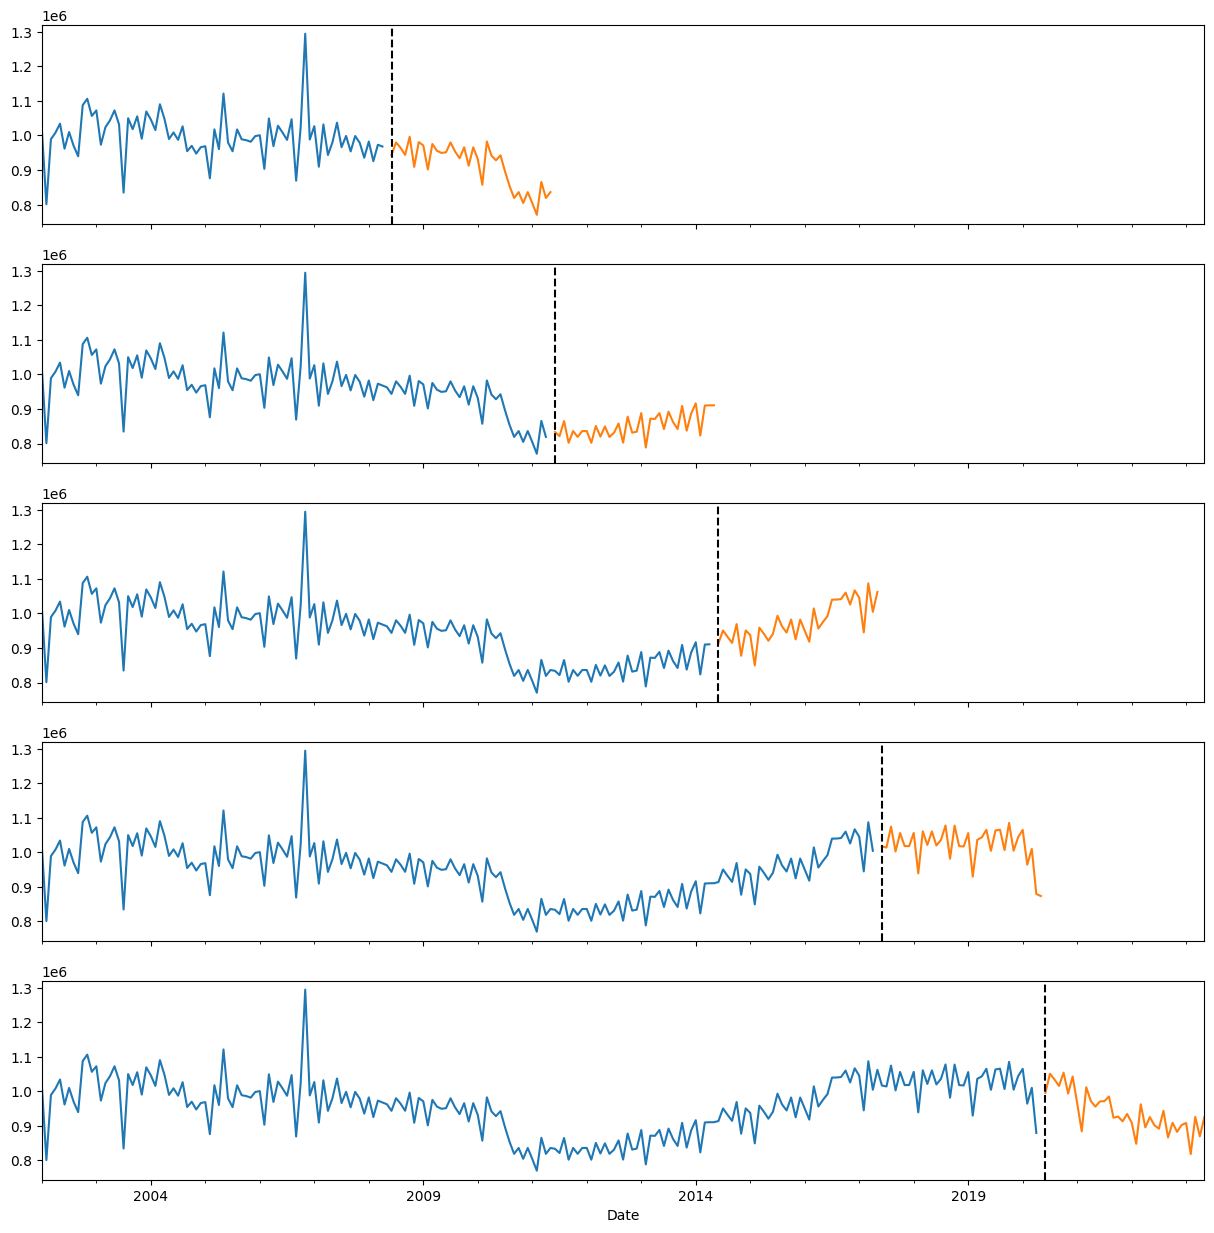

In [22]:
fig, axs = plt.subplots(5,1,figsize=(15,15),sharex=True)
fold=0
for train_idx, val_idx in tss.split(df2):
    train = df2.iloc[train_idx]
    test = df2.iloc[val_idx]
    train['Total'].plot(ax=axs[fold],label='Training Set')
    test['Total'].plot(ax=axs[fold],label='Test Set')
    axs[fold].axvline(test.index.min(),color='black',ls='--')
    fold += 1

In [56]:
from pandas.tseries.offsets import DateOffset
def add_lags(df):
    target_map = df2['Total'].to_dict()
    df2['lag1']=(df2.index - DateOffset(months=12)).map(target_map)
    df2['lag2']=(df2.index - DateOffset(months=24)).map(target_map)
    return df

In [57]:
df2 = add_lags(df2)

In [59]:
df2.columns

Index(['Total', 'year', 'month', 'quarter', 'lag1', 'lag2'], dtype='object')

In [60]:
FEATURES = ['year', 'month','quarter', 'lag1', 'lag2']
TARGET = 'Total'

In [63]:
tss = TimeSeriesSplit(n_splits=5, test_size=36, gap=1)
df2 = df2.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df2):
    train = df2.iloc[train_idx]
    test = df2.iloc[val_idx]

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[17:11:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:991055.56803	validation_1-rmse:905096.77244
[100]	validation_0-rmse:372612.17463	validation_1-rmse:287670.99885
[200]	validation_0-rmse:150830.83622	validation_1-rmse:78643.98392
[300]	validation_0-rmse:75722.63943	validation_1-rmse:61261.46812
[316]	validation_0-rmse:69340.20698	validation_1-rmse:63744.32596
[17:11:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:965523.35702	validation_1-rmse:843238.43718
[100]	validation_0-rmse:362827.70868	validation_1-rmse:283057.16262
[200]	validation_0-rmse:145136.22517	validation_1-rmse:145814.73523
[30

In [64]:
scores

[58914.95982766368,
 76193.499349565,
 98033.99262070845,
 48299.46522631716,
 48391.93944265728]

In [66]:
X_all = df2[FEATURES]
y_all = df2[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[17:14:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:951450.74364
[100]	validation_0-rmse:355312.42233
[200]	validation_0-rmse:140468.97860
[300]	validation_0-rmse:66471.91837
[400]	validation_0-rmse:45785.82352
[499]	validation_0-rmse:39404.09475


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [23]:
# train = df2.loc[df2.index < '2016-01-01']
# test = df2.loc[df2.index >= '2016-01-01']

# fig, ax = plt.subplots(figsize = (15,5))
# train.plot(ax=ax, label='Training Set')
# test.plot(ax=ax, label='Test Set')
# plt.show()

In [25]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [26]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds = 50, learning_rate=0.01)
reg.fit(X_train, y_train, eval_set = [(X_train,y_train),(X_test,y_test)],verbose=100)

[0]	validation_0-rmse:936115.05696	validation_1-rmse:980236.77021


[100]	validation_0-rmse:350915.13055	validation_1-rmse:427832.03791
[200]	validation_0-rmse:139312.49384	validation_1-rmse:213286.28188
[300]	validation_0-rmse:64528.70124	validation_1-rmse:125891.88724
[400]	validation_0-rmse:36141.53418	validation_1-rmse:95738.90183
[500]	validation_0-rmse:25147.39729	validation_1-rmse:84396.25378
[600]	validation_0-rmse:20808.00364	validation_1-rmse:78856.88791
[700]	validation_0-rmse:18239.10142	validation_1-rmse:76424.58714
[800]	validation_0-rmse:16347.38969	validation_1-rmse:75198.14806
[900]	validation_0-rmse:14687.11082	validation_1-rmse:74587.87617
[999]	validation_0-rmse:12784.70459	validation_1-rmse:74220.88644


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_,columns=['importance'])
fi

,importance
year,0.535377
month,0.464623
quarter,0.000000


In [67]:
test['prediction'] = reg.predict(X_test)

C:\Users\cindy\AppData\Local\Temp\ipykernel_2384\2903689382.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
df2 = df2.merge(test[['prediction']], how='left',left_index=True, right_index=True)

In [69]:
df2

,Total,year,month,quarter,lag1,lag2,prediction
Date,,,,,,,
2002-01-01,1016824.0,2002,1,1,NaN,NaN,NaN
2002-02-01,800968.0,2002,2,1,NaN,NaN,NaN
2002-03-01,989281.0,2002,3,1,NaN,NaN,NaN
2002-04-01,1008127.0,2002,4,2,NaN,NaN,NaN
2002-05-01,1034204.0,2002,5,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-01-01,908455.0,2023,1,1,909304.0,965453.0,894568.8125
2023-02-01,818322.0,2023,2,1,848324.0,884395.0,836619.3750
2023-03-01,926035.0,2023,3,1,962449.0,1011923.0,922922.3125


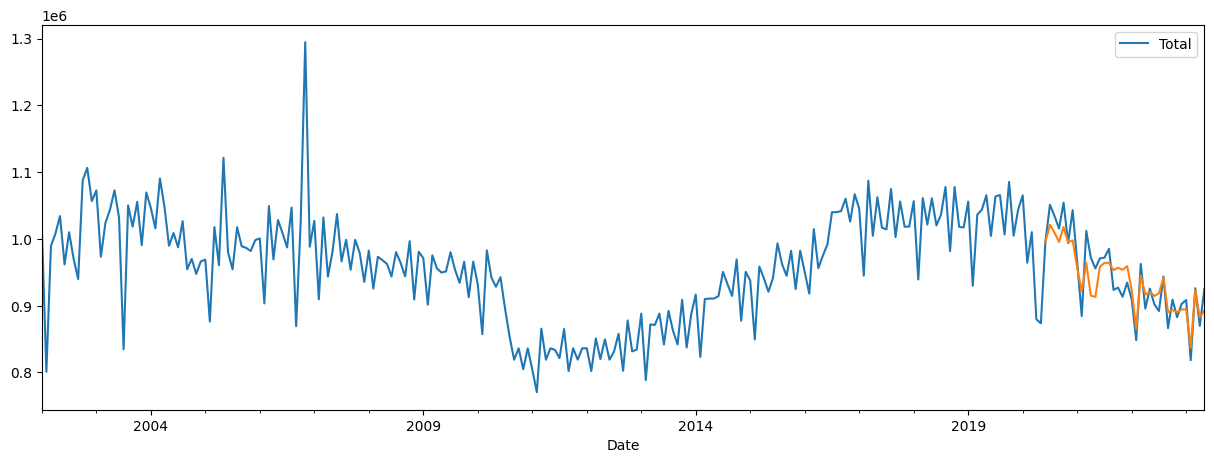

In [70]:
ax = df2[['Total']].plot(figsize=(15,5))
df2['prediction'].plot(ax=ax)
plt.show()

In [32]:
new_data = ['2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01']
nd = np.asarray([new_data])

In [65]:
t = np.arange(np.datetime64("2023-06-01"), np.datetime64("2026-05-01"),  np.timedelta64(1, 'M'),  dtype='datetime64[M]')  
t

array(['2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11',
       '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05',
       '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11',
       '2024-12', '2025-01', '2025-02', '2025-03', '2025-04', '2025-05',
       '2025-06', '2025-07', '2025-08', '2025-09', '2025-10', '2025-11',
       '2025-12', '2026-01', '2026-02', '2026-03', '2026-04'],
      dtype='datetime64[M]')

In [73]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    return df

In [74]:
future_df = pd.DataFrame(index=t)
future_df['isFuture'] = True
df2['isFuture'] = False
df_and_future = pd.concat([df2, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [75]:
future_w_features = df_and_future.query('isFuture').copy()

In [76]:
future_w_features

,Total,year,month,quarter,lag1,lag2,prediction,isFuture
2023-06-01,NaN,2023,6,2,NaN,NaN,NaN,True
2023-07-01,NaN,2023,7,3,NaN,NaN,NaN,True
2023-08-01,NaN,2023,8,3,NaN,NaN,NaN,True
2023-09-01,NaN,2023,9,3,NaN,NaN,NaN,True
2023-10-01,NaN,2023,10,4,NaN,NaN,NaN,True
2023-11-01,NaN,2023,11,4,NaN,NaN,NaN,True
2023-12-01,NaN,2023,12,4,NaN,NaN,NaN,True
2024-01-01,NaN,2024,1,1,NaN,NaN,NaN,True
2024-02-01,NaN,2024,2,1,NaN,NaN,NaN,True
2024-03-01,NaN,2024,3,1,NaN,NaN,NaN,True


In [77]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

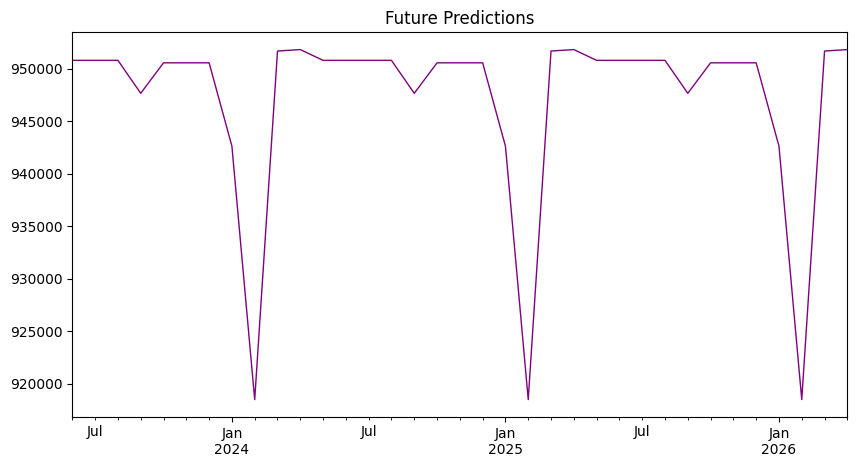

In [79]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color='purple',
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

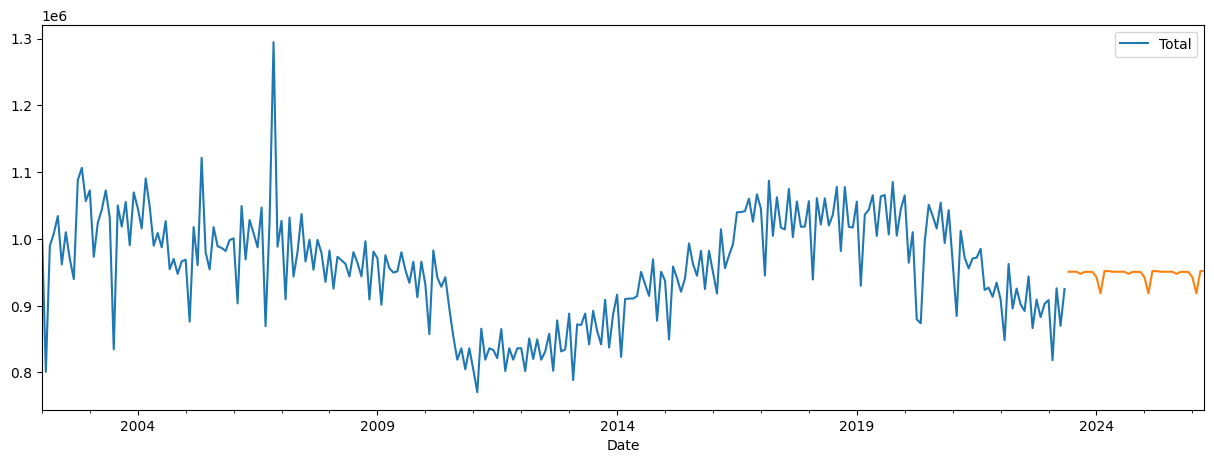

In [81]:
ax = df2[['Total']].plot(figsize=(15,5))
future_w_features['pred'].plot(ax=ax)
plt.show()

In [71]:
new_data_df = pd.DataFrame({'Date':t})
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])
new_data_df['year'] = pd.DatetimeIndex(new_data_df['Date']).year
new_data_df['month']=pd.DatetimeIndex(new_data_df['Date']).month
new_data_df['quarter']=pd.DatetimeIndex(new_data_df['Date']).quarter
new_data_df.set_index('Date', inplace=True)
new_data_df

,year,month,quarter
Date,,,
2023-06-01,2023,6,2
2023-07-01,2023,7,3
2023-08-01,2023,8,3
2023-09-01,2023,9,3
2023-10-01,2023,10,4
2023-11-01,2023,11,4
2023-12-01,2023,12,4
2024-01-01,2024,1,1
2024-02-01,2024,2,1


In [72]:
pred_new = reg.predict(new_data_df)

ValueError: Feature shape mismatch, expected: 5, got 3

In [36]:
pred_new

array([940099.25, 985443.4 , 960721.75, 944719.9 , 981098.75, 924971.8 ,
       978743.2 , 935404.2 , 851165.06, 955237.4 , 940869.1 , 922289.94,
       940099.25, 985443.4 , 960721.75, 944719.9 , 981098.75, 924971.8 ,
       978743.2 , 935404.2 , 851165.06, 955237.4 , 940869.1 , 922289.94,
       940099.25, 985443.4 , 960721.75, 944719.9 , 981098.75, 924971.8 ,
       978743.2 , 935404.2 , 851165.06, 955237.4 , 940869.1 ],
      dtype=float32)

In [37]:
new_data_df['prediction'] = pred_new
new_data_df

,year,month,quarter,prediction
Date,,,,
2023-06-01,2023,6,2,940099.2500
2023-07-01,2023,7,3,985443.3750
2023-08-01,2023,8,3,960721.7500
2023-09-01,2023,9,3,944719.8750
2023-10-01,2023,10,4,981098.7500
2023-11-01,2023,11,4,924971.8125
2023-12-01,2023,12,4,978743.1875
2024-01-01,2024,1,1,935404.1875
2024-02-01,2024,2,1,851165.0625


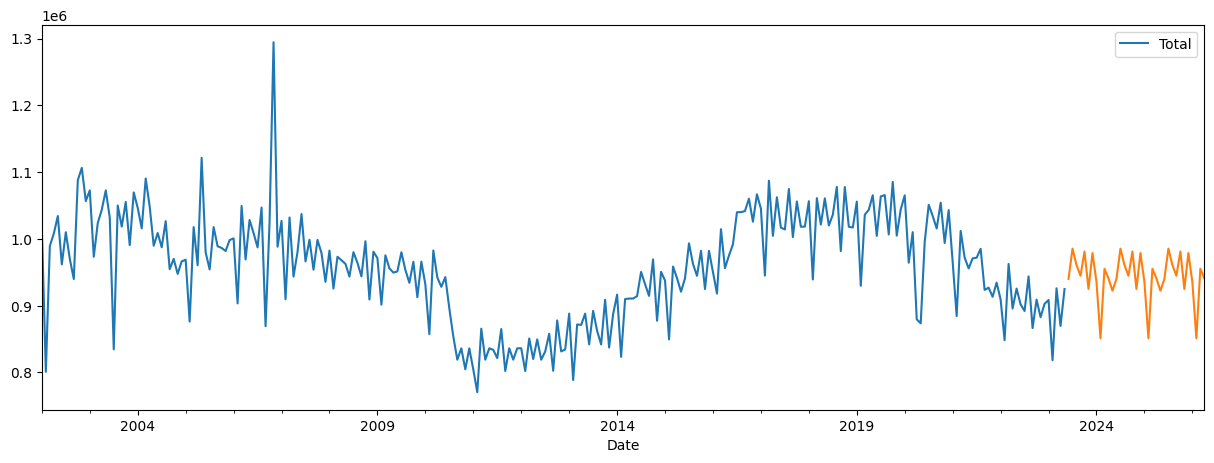

In [38]:
ax = df2[['Total']].plot(figsize=(15,5))
new_data_df['prediction'].plot(ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)


xgb = xgboost.XGBRegressor(colsample_bytree=0.7,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=1,
                 min_child_weight=1.5,
                 n_estimators=100000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.8,
                 seed=1000) 